In [1]:
import pandas as pd
import re
from collections import defaultdict as de
dataset = pd.read_csv(r'data\dbamp_100_act_label.csv', index_col = 0)


In [2]:
def dell(d,na):
    for i in na:
        del d[i]
    return d

In [3]:
def gsp_de(d,n):
    name = []
    for k, v in d.items():
        if v<n:
            name.append(k)
    return dell(d, name)

In [4]:
def gsp_cr(d):
    name = []
    for k, v in d.items():
        name.append(k)
    name_new = [i+j[-1] for i in name for j in name if i[1:]==j[:-1]]
    return name_new

In [5]:
def gsp_crdi(name, dataset):
    r = de(int)
    for i in name:
        b=''
        for j in range(len(i)-1):
            b+=i[j]+'.*' 
        b+=i[-1]
        for i in dataset['sequence'].values:
            i_new = i
            res = re.search(b, i_new)
            if not(res==None):
                r[b.replace('.*','')]+=1
    return r

In [6]:
def split(seq):
    return [i for i in seq]

In [ ]:
# 限制條件
# 1. 分type
    ## HIV, ~...

In [7]:
df_antihiv = dataset.loc[dataset.AntiHIV==1,:]
df_antibact = dataset.loc[dataset.Antibacterial==1,:]
df_anticanc = dataset.loc[dataset.Anticancer==1,:]
df_antifung = dataset.loc[dataset.Antifungal==1,:]
df_antimico = dataset.loc[dataset.Antimicrobial==1,:]
df_antiviral = dataset.loc[dataset.Antiviral==1,:]

In [8]:
print(df_antihiv.shape)
print(df_antibact.shape)
print(df_anticanc.shape)
print(df_antifung.shape)
print(df_antimico.shape)
print(df_antiviral.shape)

(699, 9)
(3286, 9)
(1431, 9)
(3383, 9)
(3691, 9)
(1082, 9)


In [10]:
df = df_antihiv

In [74]:
import matplotlib.pyplot as plt

def barh_graph(di, nuu):
    if len(di.keys()) > 25:
        data_col = list(di.keys())[-25:]
        data = list(di.values())[-25:]
    else:
        data_col = list(di.keys())
        data = list(di.values())
    plt.barh(data_col, data)
    plt.xlabel("Values")
    plt.ylabel("Frequency")
    plt.title("L" + str(nuu)+' pattern')
    plt.show()

In [35]:
def sort_dict(di):
    return {k: v for k, v in sorted(di.items(), key=lambda item: item[1])}

L1:
defaultdict(<class 'int'>, {'P': 377, 'E': 514, 'L': 607, 'C': 241, 'Q': 346, 'T': 431, 'S': 472, 'N': 389, 'G': 438, 'A': 492, 'R': 370, 'I': 529, 'V': 463, 'H': 215, 'M': 169, 'K': 509, 'W': 380, 'F': 332, 'D': 336, 'Y': 304})


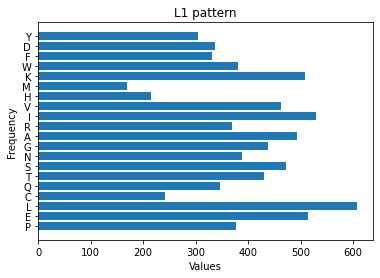

L2:


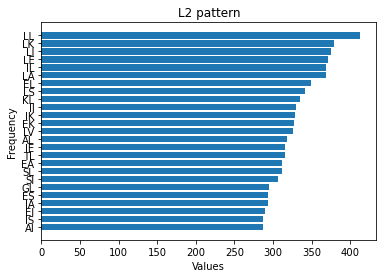

L3:


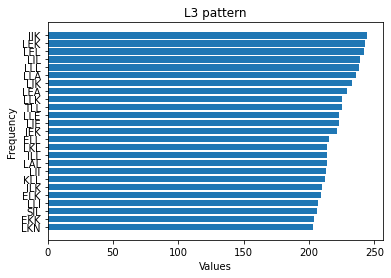

L4:


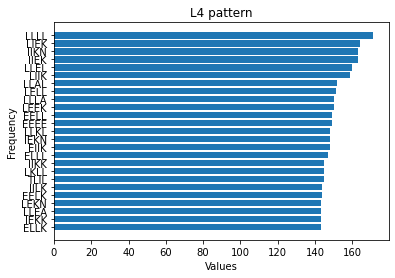

L5:


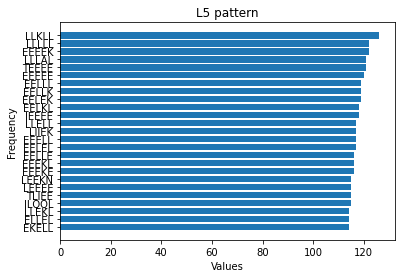

L6:


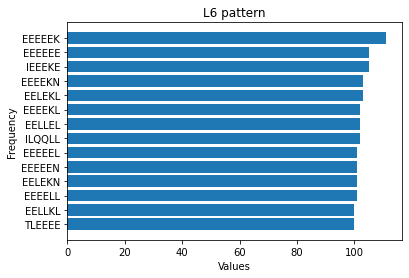

In [76]:
min_sup = 100
r_1=[]
r_1_di = de(int)
for i in df['sequence'].values:
    for j in set(split(i)):
        r_1_di[j[0]]+=1
di = gsp_de(r_1_di, min_sup) # min_sup = 2
print('L1:')
print(di)
nuu=1
barh_graph(di, nuu)
name = []
for k, v in di.items():
    name.append(k)
name_new = [i+j for i in name for j in name]
r_di = gsp_crdi(name_new,df)
di_3 = gsp_de(r_di,min_sup)
while(len(di_3) != 0):
    print('L'+str(nuu+1)+':')
    # print(di_3)
    di_3 = sort_dict(di_3)
    barh_graph(di_3, nuu+1)
    name_n = gsp_cr(di_3)
    r_di = gsp_crdi(name_n,df)
    di_3 = gsp_de(r_di,min_sup)
    nuu+=1
